# Temporal Cross-Validation Tutorial

In this tutorial, we show how to set up a temporal cross-validator for a simple RNN model using the Deep4Cast package. The dataset we're using is from the GEFCom2014 forecasting competition and involved hourly energy load forecasting.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from deep4cast.forecasters import Forecaster, CrossValidator
from pandas import read_table

%matplotlib inline

Using TensorFlow backend.


## Data preparation

Before we can fit a model we first have to load, clean, and prepare our dataset so that the model can accept it.

Text(0,0.5,'Quantity')

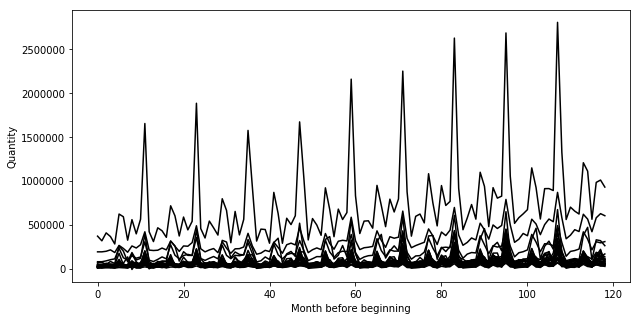

In [2]:
# Load the data from file
filename = 'timeseries_data.csv'
df = read_table(filename, sep=',')

# Prepare the data set
data = df.values
data = np.expand_dims(data, 0)

# Plot the dataset
plt.figure(figsize=(10,5))
plt.plot(data[0,:,:], 'k')
plt.xlabel('Month before beginning')
plt.ylabel('Quantity')

## Recurrent Neural Network Forecaster

First, let's set up the forecaster and the topology that we want to evaluate

In [3]:
topology = [
    {
        'meta': {
            'layer_type': 'GRU', 
            'layer_id': 'gru1', 
            'parent_ids': ['input']
        },
        'params': {
            'units': 32, 
            'activation': 'relu',
            'return_sequences': False
        }
    }
]

In [10]:
params = {
    'topology': topology, 
    'optimizer': 'nadam',
    'lag': 20, 
    'horizon': 9, 
    'max_epochs': 10, 
    'lr': 0.001, 
    'dropout_rate': 0.1, 
    'loss': 'heteroscedastic_gaussian'
}

forecaster = Forecaster(**params)

Now, we create the validator object that essentially just wraps the forecaster.

In [11]:
validator = CrossValidator(forecaster, val_fraction=0.20, n_folds=1)

Training fraction is 0.8.


Let's perform temporal cross-validation on the dataset

In [12]:
validator.evaluate(data, n_samples=1000)

Epoch 1/10


AttributeError: 'ProgbarLogger' object has no attribute 'log_values'